# Titanic Suvivior Data Analysis

Project 2 for Udacity Data Analyst Nanodegree

The goal of this project is to analysis the titanic dataset, which is obtained from the [Kaggle website](https://www.kaggle.com/c/titanic/data). The data file contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. 

In [40]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load data from csv
df = pd.read_csv("titanic_data.csv")

Populating the interactive namespace from numpy and matplotlib


First, I want to check if the data is properly loaded and what we have in the dataset.

In [41]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [42]:
print df.columns, len(df.columns)

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object') 12


Okay, we can see that there are 12 columns with different data for individual passenger. And for me, the most interesting data are for age, sex, and class. As everyone knows, that there are many more female who survived the tragedy, I would like to first confirm that base on the data and then check if age and class are also important indicator for the passengers' chance for survival. 

In [43]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [45]:
survived_ct = df['Survived'].sum()
survival_rate = df['Survived'].mean()
print "Total Number of Passengers: {}".format(len(df))
print "Total Number of People Survived: {}".format(survived_ct)

Total Number of Passengers: 891
Total Number of People Survived: 342


Now we know that the survivor rate is 38.38% and most people on boat were in the third class. And there are a lot of missing data in Cabin, however, as my own interest in not in this set of data, I will leave it as it is. 
Some data points that stand out:
- The minimum age is 0.42, which is strange as other's age are in integer.
- The maximam age is 80, which is possible but not likely.
- The max fare is 512.329, which is significantly higher than the average.
- The zero ticket fare.
Let's check if they are correct input. 

In [46]:
min_age = df.Age.argmin()
print df.iloc[min_age]

PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object


I did a Google serach for this passenger and confirmed that he is indeed a four month old child when he embarked the ship. Therefore, this input is correct.

In [47]:
max_age = df.Age.argmax()
print df.iloc[max_age]

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                              80
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                             30
Cabin                                           A23
Embarked                                          S
Name: 630, dtype: object


According to the google search result, this is a piece of bad data. The passenger was 47 at the time [[Ref]](http://www.encyclopedia-titanica.org/titanic-survivor/algernon-barkworth.html). 

In [48]:
df.loc[630,'Age'] = 47.0

In [49]:
# Check if the data is changed.
df.loc[630,'Age']

47.0

In [50]:
# Check the expensive fare
expensive_fare = df[df.Fare > 500]
expensive_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


There are three people bought the 512 dollar ticket and they are all in first class, therefore it should to be correct. The further google search also confirmed it.

In [51]:
zero_fare = df[df.Fare == 0]
zero_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


All people but one who recorded fare at 0 have lost their life during the tragedy. I randomly selected few to search for fare info but failed to find any. As I won't focus on fare I will leave it as it is. 

As passenger's sex is recorded in str, it is not easy to manipulate, therefore, I will change it to int, using 0 to present "male" and 1 for "female".

In [52]:
def std_gender(input):
    if input == "male":
        return 0
    elif input == "female":
        return 1
    else:
        return input

# make copy of the old data
old_df = df
df = df.applymap(std_gender)

In [53]:
# check if the data is updated
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.652899,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.418327,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,74.000000,8.000000,6.000000,512.329200


### Explore the data

I am interested in **Age**, **Pclass**, and **Sex** of passengers and how they affect the passenger's chance for survival. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1168e32d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x116a033d0>], dtype=object)

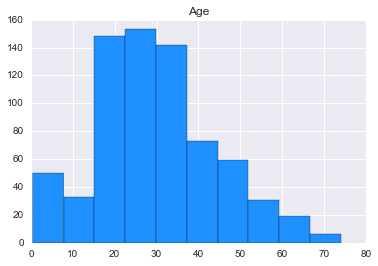

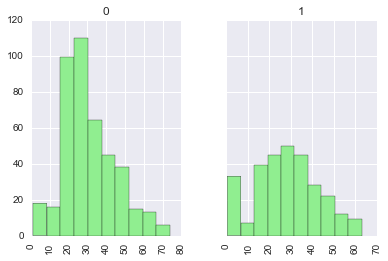

In [55]:
# General Age Distribution
df.hist(column = "Age", color = "dodgerblue")
df.hist(column = "Age", by = "Survived", color = "lightgreen",sharey = True)

In [56]:
df[df.Age <=15].describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,431.602410,0.590361,2.626506,0.518072,6.369518,1.734940,1.265060,32.785795
std,287.079319,0.494757,0.619024,0.502711,4.729063,1.638592,0.682255,33.466438
min,8.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,7.225000
25%,172.500000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000,15.900000
50%,436.000000,1.000000,3.000000,1.000000,5.000000,1.000000,1.000000,26.250000
75%,706.500000,1.000000,3.000000,1.000000,9.500000,3.000000,2.000000,32.193750
max,876.000000,1.000000,3.000000,1.000000,15.000000,5.000000,2.000000,211.337500


Children's survival rate is 59%, higher than the average rate at 38%. But there may be other reasons than being kids, for example, there are more kids who are female. We are not sure so far.

In [57]:
df[df.Age <=15].groupby("Sex").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
0,448.550000,0.525000,2.625000,5.466750,2.22500,1.350000,34.380522
1,415.837209,0.651163,2.627907,7.209302,1.27907,1.186047,31.302328


In [58]:
df[df.Age <=15].groupby("Pclass").mean()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,,
1,496.500000,0.833333,0.500000,7.820000,0.666667,1.833333,139.382633
2,427.789474,1.000000,0.526316,4.543684,0.789474,1.263158,28.323905
3,426.137931,0.431034,0.517241,6.817586,2.155172,1.206897,23.220190


We can see that there are almost equal number of girls and boys in different class. However, the survival rate only significantly increased for children who are in the first and second class. Therefore, out of the 3 factors, class may be the best indicator for children's survival. 

In [59]:
df[df.Age >= 60].describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,25.000000,25.00000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,448.800000,0.24000,1.560000,0.160000,64.500000,0.24000,0.320000,44.006668
std,242.299917,0.43589,0.820569,0.374166,4.193249,0.43589,0.852447,52.252063
min,34.000000,0.00000,1.000000,0.000000,60.000000,0.00000,0.000000,6.237500
25%,276.000000,0.00000,1.000000,0.000000,61.000000,0.00000,0.000000,10.500000
50%,484.000000,0.00000,1.000000,0.000000,63.000000,0.00000,0.000000,26.550000
75%,626.000000,0.00000,2.000000,0.000000,66.000000,0.00000,0.000000,61.979200
max,852.000000,1.00000,3.000000,1.000000,74.000000,1.00000,4.000000,263.000000


And people who are older than 60 are less likely to survive. However, they are also mostly male. 

In [60]:
# Check if survival rate of people older than 60 is most because of their sex.  
df.groupby("Sex").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
0,454.147314,0.188908,2.389948,30.653797,0.429809,0.235702,25.523893
1,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818


In [61]:
df[df.Age >= 60].groupby("Pclass").mean()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,,
1,449.75,0.25,0.1875,63.8125,0.3125,0.4375,61.910419
2,490.75,0.25,0.0000,64.5000,0.2500,0.2500,17.625000
3,412.20,0.20,0.2000,66.7000,0.0000,0.0000,7.820000


Now we know that even though people who are over 60 are less likely to survive. If you are in the first or second class, your chance for survival can increase a bit. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x116956b90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x116dd1b10>], dtype=object)

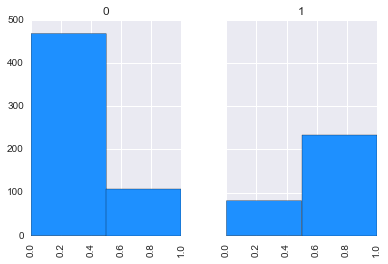

In [62]:
# Female and male comparison. Male is in the left and female in the right. 
df.hist(column = "Survived",color='dodgerblue', by = "Sex",sharey = True, bins = 2)

In [63]:
df.groupby("Sex").describe()

Age        Fare       Parch  PassengerId      Pclass  \
Sex                                                                      
0   count  453.000000  577.000000  577.000000   577.000000  577.000000   
    mean    30.653797   25.523893    0.235702   454.147314    2.389948   
    std     14.514089   43.138263    0.612294   257.486139    0.813580   
    min      0.420000    0.000000    0.000000     1.000000    1.000000   
    25%     21.000000    7.895800    0.000000   222.000000    2.000000   
    50%     29.000000   10.500000    0.000000   464.000000    3.000000   
    75%     39.000000   26.550000    0.000000   680.000000    3.000000   
    max     74.000000  512.329200    5.000000   891.000000    3.000000   
1   count  261.000000  314.000000  314.000000   314.000000  314.000000   
    mean    27.915709   44.479818    0.649682   431.028662    2.159236   
    std     14.110146   57.997698    1.022846   256.846324    0.857290   
    min      0.750000    6.750000    0.000000     2.000000    1.000000   
    25%     18.000000   12.071875    0.000000   231.750000    1.000000   
    50%     27.000000   23.000000    0.000000   414.500000    2.000000   
    75%     37.000000   55.000000    1.000000   641.250000    3.000000   
    max     63.000000  512.329200    6.000000   889.000000    3.000000   

                SibSp    Survived  
Sex                                
0   count  577.000000  577.000000  
    mean     0.429809    0.188908  
    std      1.061811    0.391775  
    min      0.000000    0.000000  
    25%      0.000000    0.000000  
    50%      0.000000    0.000000  
    75%      0.000000    0.000000  
    max      8.000000    1.000000  
1   count  314.000000  314.000000  
    mean     0.694268    0.742038  
    std      1.156520    0.438211  
    min      0.000000    0.000000  
    25%      0.000000    0.000000  
    50%      0.000000    1.000000  
    75%      1.000000    1.000000  
    max      8.000000    1.000000

In [64]:
man = df[df['Sex'] == 0]
man_surv = man[man['Survived'] == 1]
man_surv_rate = float(len(man_surv))/float(len(man))
woman = df[df['Sex'] == 1]
woman_surv = woman[woman['Survived'] == 1]
woman_surv_rate = float(len(woman_surv))/float(len(woman))
print "Male Survival Rate: {0:.2f}".format(man_surv_rate) 
print "Female Survival Rate: {0:.2f}".format(woman_surv_rate)

Male Survival Rate: 0.19
Female Survival Rate: 0.74


We can see that there are many more male on the boat than female while there are more female who survived than man. This confirmed our previous belief. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117800050>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1178a5c10>], dtype=object)

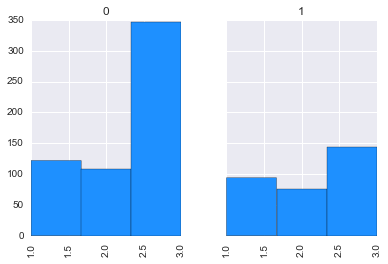

In [65]:
df.hist(column = "Pclass",color='dodgerblue', by = "Sex",sharey = True, bins = 3)

What we see here is the number of people from different class sorted by the class they were in. And we see that there are significantly more man in the third class than in the first class. Therefore, more male in the third class may also lead to the result that woman's survial rate is higher than male.   

In [66]:
df.groupby("Pclass").mean()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,,
1,461.597222,0.629630,0.435185,38.056022,0.416667,0.356481,84.154687
2,445.956522,0.472826,0.413043,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,0.293279,25.140620,0.615071,0.393075,13.675550


In [67]:
man.groupby("Pclass").mean()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,,
1,455.729508,0.368852,0.0,40.954653,0.311475,0.278689,67.226127
2,447.962963,0.157407,0.0,30.740707,0.342593,0.222222,19.741782
3,455.515850,0.135447,0.0,26.507589,0.498559,0.224784,12.661633


We can see that man's survival rate are significantly lower than the average no matter which class they were in. 
Only men in the first class reach the average survival rate. 

In [68]:
woman.groupby("Pclass").mean()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,,
1,469.212766,0.968085,1.0,34.611765,0.553191,0.457447,106.125798
2,443.105263,0.921053,1.0,28.722973,0.486842,0.605263,21.970121
3,399.729167,0.500000,1.0,21.750000,0.895833,0.798611,16.118810


array([<matplotlib.axes._subplots.AxesSubplot object at 0x117ad2d10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x117c31910>], dtype=object)

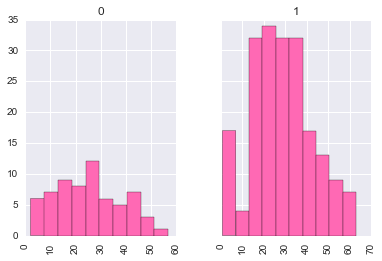

In [69]:
woman.hist(column = "Age", by = "Survived", color = "hotpink",sharey = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116956750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118033710>]], dtype=object)

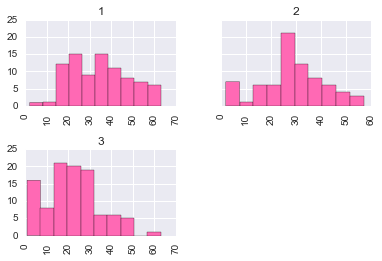

In [70]:
woman.hist(column = "Age", by = "Pclass", color = "hotpink",sharey = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118180150>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118674210>]], dtype=object)

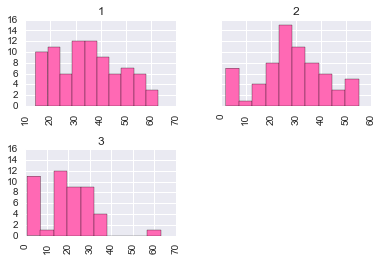

In [71]:
woman_surv.hist(column = "Age", by = "Pclass", color = "hotpink",sharey = True)

From looking at the graph, I discovered that the chance for woman in the third class is quite low, especially if you are older. However, there is one strange case that one woman who are above 60 survived.

In [72]:
older_women = woman[woman.Age>40]
older_women.groupby("Pclass").mean()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,,
1,511.038462,0.961538,1.0,51.192308,0.500000,0.307692,92.410581
2,549.230769,0.846154,1.0,47.923077,0.384615,0.615385,21.980769
3,415.000000,0.111111,1.0,46.444444,0.444444,2.333333,23.929633


In [73]:
older_women[older_women.Pclass == 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",1,47.0,1,0,A/5. 3337,14.5000,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",1,45.0,1,4,347088,27.9000,NaN,S
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",1,41.0,0,2,370129,20.2125,NaN,S
276,277,0,3,"Lindblom, Miss. Augusta Charlotta",1,45.0,0,0,347073,7.7500,NaN,S
362,363,0,3,"Barbara, Mrs. (Catherine David)",1,45.0,0,1,2691,14.4542,NaN,C
483,484,1,3,"Turkula, Mrs. (Hedwig)",1,63.0,0,0,4134,9.5875,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",1,41.0,0,5,3101295,39.6875,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",1,43.0,1,6,CA 2144,46.9000,NaN,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",1,48.0,1,3,W./C. 6608,34.3750,NaN,S


Google result confirmed that Mrs.Turkula survived, which is astonishing. 
Overall, even though female's survival rate is high, female in the third class were less likely to survive than those in the first and second class. 

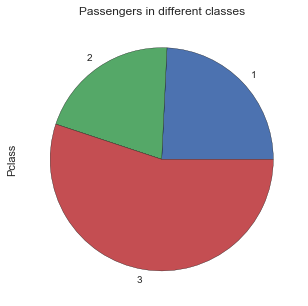

In [74]:
pie_class = pd.Series(df.Pclass.value_counts().sort_index())
pie_class.plot(kind = "pie",figsize = (5,5), title = "Passengers in different classes")

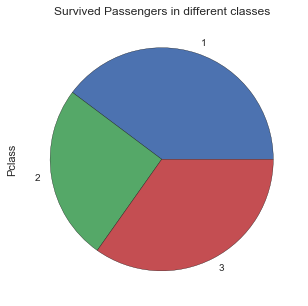

In [75]:
surv = df[df.Survived == 1]
pie_class_surv = pd.Series(surv.Pclass.value_counts().sort_index())
pie_class_surv.plot(kind = "pie",figsize = (5,5), title = "Survived Passengers in different classes")

In [76]:
df.groupby("Pclass").mean()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,,
1,461.597222,0.629630,0.435185,38.056022,0.416667,0.356481,84.154687
2,445.956522,0.472826,0.413043,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,0.293279,25.140620,0.615071,0.393075,13.675550


In [77]:
third_class = df[df.Pclass == 3]
third_class.groupby("Sex").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
0,455.515850,0.135447,3.0,26.507589,0.498559,0.224784,12.661633
1,399.729167,0.500000,3.0,21.750000,0.895833,0.798611,16.118810


In [78]:
man.groupby("Pclass").mean()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,,
1,455.729508,0.368852,0.0,40.954653,0.311475,0.278689,67.226127
2,447.962963,0.157407,0.0,30.740707,0.342593,0.222222,19.741782
3,455.515850,0.135447,0.0,26.507589,0.498559,0.224784,12.661633


We had a question ealier that if the reason for worse survival rate for male is because of more male are in the third class; now we know that is not the case as woman in the third class have a significant higher survival rate than those of man travelling in the third class. 

### Tentative Conclusion

- Female are more likely to survive than man in general. However, older women in third class are less likely to survive.    
- Male are more likely to die in the tragedy, unless they are in the first class. 
- People in the first are more likely to survive than others. And women in the second class are also more likely to survive. 
- Boys and girls younger than 15 are equally likely to survive, and they are higher chance for survival if they are in the first and second class. 